In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:\\Users\\sares\\Downloads\\Financials.csv")

In [38]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$0,"$32,370.00","$16,185.00",NaN,01-01-2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$0,"$26,420.00","$13,210.00",NaN,01-01-2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$0,"$32,670.00","$21,780.00",NaN,01-06-2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$0,"$13,320.00","$8,880.00",NaN,01-06-2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$0,"$37,050.00","$24,700.00",NaN,01-06-2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00",NaN,01-03-2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00",NaN,01-10-2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00",NaN,01-02-2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",NaN,01-04-2014,4,April,2014


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        700 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    float64
 6   Sale Price           700 non-null    float64
 7   Gross Sales          700 non-null    float64
 8   Discounts            700 non-null    float64
 9   Sales                700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               637 non-null    float64
 12  Date                 700 non-null    object 
 13  Month Number         700 non-null    int64  
 14  Month Name           700 non-null    object 
 15  Year                 700 non-null    int

In [43]:

# Clean column names
df.columns = df.columns.str.strip()

# List of money-related columns to clean
money_columns = ['Units Sold', 'Manufacturing Price', 'Sale Price',
                 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']
for col in money_columns:
    df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True)     # Remove $ and commas
    df[col] = df[col].replace(['-', ' - ', ' -', '- ', ' -   '], pd.NA)      # Replace dash-like entries with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')                       # Convert to float

# Confirm fix
df[money_columns].dtypes






Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
dtype: object

In [32]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$0,"$32,370.00","$16,185.00","$16,185.00",01-01-2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$0,"$26,420.00","$13,210.00","$13,210.00",01-01-2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$0,"$32,670.00","$21,780.00","$10,890.00",01-06-2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$0,"$13,320.00","$8,880.00","$4,440.00",01-06-2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$0,"$37,050.00","$24,700.00","$12,350.00",01-06-2014,6,June,2014


In [37]:
df.tail()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00",NaN,01-03-2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00",NaN,01-10-2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00",NaN,01-02-2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",NaN,01-04-2014,4,April,2014
699,Channel Partners,United States of America,VTT,High,"$1,806.00",$250.00,$12.00,"$21,672.00","$3,250.80","$18,421.20","$5,418.00",NaN,01-05-2014,5,May,2014


In [4]:
df.describe()


,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


In [34]:
print(df.columns)

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')


In [51]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values(by='Date')
print(df)


        Segment                   Country      Product Discount Band  \
202  Government                    Canada        Velo           Low    
179  Government  United States of America        Velo           Low    
523   Midmarket                    Mexico        Velo          High    
532  Enterprise                    Mexico    Amarilla          High    
314  Government                    Mexico   Carretera        Medium    
..          ...                       ...          ...           ...   
511   Midmarket                    Mexico     Montana          High    
164  Enterprise                   Germany       Paseo           Low    
163  Enterprise                    France       Paseo           Low    
265  Government  United States of America         VTT        Medium    
451  Government                    Mexico         VTT        Medium    

     Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
202      2646.0                120.0        20.0      52920

In [22]:
print(df.columns.tolist())

['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year']


In [35]:
df.columns = df.columns.str.strip()  # removes leading/trailing spaces


In [24]:
df.columns = df.columns.str.strip()


nan
nan


In [27]:
df['profit'] = pd.to_numeric(df['profit'], errors='coerce')


In [48]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)

print("Q1:", Q1)
print("Q3:", Q3)


Q1: 3875.85
Q3: 25162.0


In [49]:
IQR=Q3-Q1
IQR

np.float64(21286.15)

In [51]:
low_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_outlier=df[(df['Profit']<low_bound) | (df['Profit'] > upper_bound)]
print(df_outlier)

        Segment                   Country      Product Discount Band  \
5    Government                   Germany   Carretera          None    
19   Government                   Germany       Paseo          None    
26   Government                    Canada       Paseo          None    
30   Government                   Germany       Paseo          None    
34   Government                   Germany        Velo          None    
..          ...                       ...          ...           ...   
632  Government                    Canada     Montana          High    
646  Government                    France       Paseo          High    
673  Government                    Mexico       Paseo          High    
678  Government  United States of America       Paseo          High    
679  Government                    Mexico       Paseo          High    

      Units Sold Manufacturing Price Sale Price     Gross Sales  \
5     $1,513.00               $3.00    $350.00    $5,29,550.00    
1

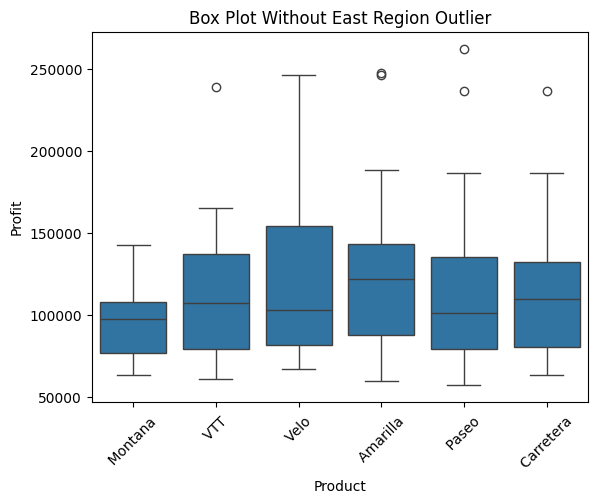

In [78]:
Q1=df['Profit'].quantile(0.25)
Q3=df['Profit'].quantile(0.75)
IQR=Q3-Q1
low_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 *IQR
df_outlier = df[(df['Profit'] < low_bound) | (df['Profit'] > upper_bound)]

sns.boxplot(data=df_outlier, x='Product', y='Profit')
plt.title('Box Plot With Outlier')
plt.xlabel('Product')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


In [92]:
df[(df['Profit'] <low_bound)| (df['Profit'] >upper_bound)]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
5,Government,Germany,Carretera,None,1513.0,3.0,350.0,529550.0,0.0,529550.0,393380.0,136170.0,01-12-2014,12,December,2014
12,Small Business,Mexico,Montana,None,958.0,5.0,300.0,287400.0,0.0,287400.0,239500.0,47900.0,01-08-2014,8,August,2014
19,Government,Germany,Paseo,None,1006.0,10.0,350.0,352100.0,0.0,352100.0,261560.0,90540.0,01-06-2014,6,June,2014
26,Government,Canada,Paseo,None,1725.0,10.0,350.0,603750.0,0.0,603750.0,448500.0,155250.0,01-11-2013,11,November,2013
30,Government,Germany,Paseo,None,1513.0,10.0,350.0,529550.0,0.0,529550.0,393380.0,136170.0,01-12-2014,12,December,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Government,France,Paseo,High,1922.0,10.0,350.0,672700.0,94178.0,578522.0,499720.0,78802.0,01-11-2013,11,November,2013
657,Government,France,VTT,High,1281.0,250.0,350.0,448350.0,62769.0,385581.0,333060.0,52521.0,01-12-2013,12,December,2013
673,Government,Mexico,Paseo,High,2851.0,10.0,350.0,997850.0,149677.5,848172.5,741260.0,106912.5,01-05-2014,5,May,2014
678,Government,United States of America,Paseo,High,2007.0,10.0,350.0,702450.0,105367.5,597082.5,521820.0,75262.5,01-11-2013,11,November,2013


In [92]:
!pip install --upgrade pandas


In [43]:
# Remove unwanted characters
df['Profit'] = df['Profit'].astype(str).str.replace(r'[\$,]', '', regex=True)
df['Profit'] = df['Profit'].replace(['-', ' - ', 'N/A', '', 'nan'], pd.NA)
df['rofit'] = pd.to_numeric(df['profit'], errors='coerce')


In [65]:
df['Discounts'] = df['Discounts'].astype(str).str.replace(r'[\$,]', '', regex=True)
df['Discounts'] = df['Discounts'].replace(['-', ' - ', 'N/A', '', 'nan'], pd.NA)
df['Discounts'] = pd.to_numeric(df['Discounts'], errors='coerce')

In [53]:
df.columns = df.columns.str.strip()


In [55]:
print(df.columns)

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')


In [66]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,01-01-2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,01-01-2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,01-06-2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,01-06-2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,01-06-2014,6,June,2014


In [67]:
df.tail()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,01-03-2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,01-10-2014,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,01-02-2014,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,01-04-2014,4,April,2014
699,Channel Partners,United States of America,VTT,High,1806.0,250.0,12.0,21672.0,3250.80,18421.20,5418.0,13003.20,01-05-2014,5,May,2014


In [68]:
low_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_outlier=df[(df['Profit']<low_bound) | (df['Profit'] > upper_bound)]
print(df_outlier)

        Segment                   Country      Product Discount Band  \
5    Government                   Germany   Carretera          None    
19   Government                   Germany       Paseo          None    
26   Government                    Canada       Paseo          None    
30   Government                   Germany       Paseo          None    
34   Government                   Germany        Velo          None    
..          ...                       ...          ...           ...   
632  Government                    Canada     Montana          High    
646  Government                    France       Paseo          High    
673  Government                    Mexico       Paseo          High    
678  Government  United States of America       Paseo          High    
679  Government                    Mexico       Paseo          High    

     Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
5        1513.0                  3.0       350.0     529550

In [83]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
low_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

# 4. Remove outliers
df_clean = df[(df['Profit'] >= low_bound) & (df['Profit'] <= upper_bound)]

In [84]:
print(df_clean)

              Segment                   Country      Product Discount Band  \
0          Government                    Canada   Carretera          None    
1          Government                   Germany   Carretera          None    
2           Midmarket                    France   Carretera          None    
3           Midmarket                   Germany   Carretera          None    
4           Midmarket                    Mexico   Carretera          None    
..                ...                       ...          ...           ...   
695    Small Business                    France    Amarilla          High    
696    Small Business                    Mexico    Amarilla          High    
697        Government                    Mexico     Montana          High    
698        Government                    Canada       Paseo          High    
699  Channel Partners  United States of America         VTT          High    

     Units Sold  Manufacturing Price  Sale Price  Gross Sales  

In [72]:
df.shape

(700, 16)

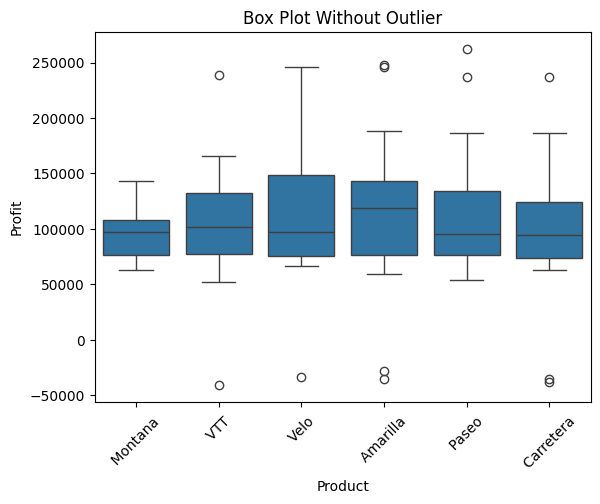

In [228]:
Q1=df['Profit'].quantile(0.25)
Q3=df['Profit'].quantile(0.75)
IQR=Q3-Q1
low_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 *IQR
df_outlier = df[(df['Profit'] < low_bound) | (df['Profit'] > upper_bound)]

sns.boxplot(data=df_outlier, x='Product', y='Profit')
plt.title('Box Plot Without Outlier')
plt.xlabel('Product')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

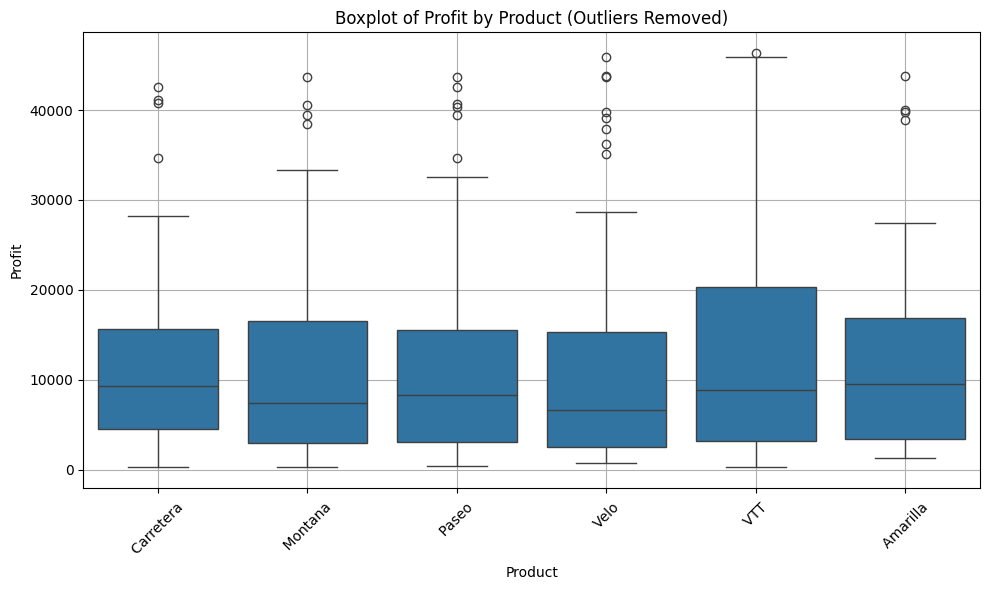

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Product', y='Profit')

# Customize labels and title
plt.title('Boxplot of Profit by Product (Outliers Removed)')
plt.xlabel('Product')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [192]:
# Method 1: Z-score with groupby
def remove_outliers_zscore(group, column='Profit', threshold=3):
    z = np.abs(stats.zscore(group[column]))
    return group[z < threshold]

# Method 2: Median Absolute Deviation
def remove_outliers_mad(group, column='Profit', threshold=3.5):
    median = group[column].median()
    mad = stats.median_abs_deviation(group[column], scale='normal')
    return group[
        (group[column] >= median - threshold*mad) & 
        (group[column] <= median + threshold*mad)
    ]




In [175]:
# Check how many outliers were removed
original_count = len(df)
cleaned_count = len(df_clean)
print(f"Removed {original_count - cleaned_count} outliers")
print(f"{((original_count - cleaned_count)/original_count):.1%} of data removed")

# View the most extreme remaining values
print("\nTop 5 Highest Values Remaining:")
print(df_clean.nlargest(5, 'Profit'))

Removed 80 outliers
11.4% of data removed

Top 5 Highest Values Remaining:
            Segment                   Country Product Discount Band  \
493      Government                    Canada    VTT           Low    
544  Small Business                    Mexico    VTT        Medium    
484      Government  United States of America    VTT        Medium    
46   Small Business                    Canada    VTT        Medium    
240  Small Business                    Canada    VTT           Low    

     Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
493       943.5                250.0       350.0     330225.0    3302.25   
544      2747.0                250.0       300.0     824100.0   57687.00   
484      1351.5                250.0       350.0     473025.0   42572.25   
46       2436.0                250.0       300.0     730800.0   43848.00   
240      1874.0                250.0       300.0     562200.0   16866.00   

         Sales      COGS    Profit  Month

In [176]:
df_clean = df.groupby('Product').apply(
    lambda x: remove_outliers(x, multiplier=3.0)
)

C:\Users\sares\AppData\Local\Temp\ipykernel_29596\1032540822.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df.groupby('Product').apply(


In [179]:
# Products that may need investigation
print("\nProducts Needing Review:")
print(clean_stats[clean_stats['count'] < 10])


Products Needing Review:
Empty DataFrame
Columns: [count, min, median, max]
Index: []


In [180]:
# Alternative 1: Show available values without NaNs
print(df_clean.groupby('Product')['Profit'].apply(lambda x: x.nlargest(5).tolist()))

# Alternative 2: Top values as a clean dataframe
top_values = (df_clean.groupby('Product')['Profit']
              .apply(lambda x: x.nlargest(5).reset_index(drop=True))
              .unstack())
print(top_values.dropna(how='all', axis=1))

Product
Amarilla        [74236.5, 63960.0, 59860.0, 50163.0, 48444.0]
Carretera       [63249.0, 47787.0, 42528.0, 41073.5, 40788.0]
Montana         [76798.0, 70642.0, 67620.0, 63249.0, 52200.0]
Paseo           [78802.0, 76512.0, 76032.0, 75262.5, 63960.0]
VTT           [81612.75, 79663.0, 79062.75, 77952.0, 76834.0]
Velo            [66960.0, 48111.0, 47328.0, 45880.0, 43750.0]
Name: Profit, dtype: object
                   0        1         2        3        4
Product                                                  
Amarilla    74236.50  63960.0  59860.00  50163.0  48444.0
Carretera   63249.00  47787.0  42528.00  41073.5  40788.0
Montana     76798.00  70642.0  67620.00  63249.0  52200.0
Paseo       78802.00  76512.0  76032.00  75262.5  63960.0
VTT         81612.75  79663.0  79062.75  77952.0  76834.0
Velo        66960.00  48111.0  47328.00  45880.0  43750.0


In [189]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Verify column names first
print("DataFrame columns:", df_final_clean.columns.tolist())

# 2. Ensure correct column names (adjust if needed)
# If your column is named differently, change these:
x_col = 'Product'  # Change if your category column has a different name
y_col = 'Profit'   # Change if your value column has a different name

# 3. Final visualization with error handling
plt.figure(figsize=(14, 7))

try:
    # Create boxplot without hue to avoid duplication
    ax = sns.boxplot(
        data=df_final_clean,
        x=x_col,
        y=y_col,
        palette='viridis',
        showfliers=False
    )
    
    # Add data points
    sns.stripplot(
        data=df_final_clean,
        x=x_col,
        y=y_col,
        color='black',
        size=4,
        alpha=0.5,
        jitter=0.2
    )
    
    # Add median labels
    medians = df_final_clean.groupby(x_col)[y_col].median()
    for i, (product, median) in enumerate(medians.items()):
        ax.text(i, median, f'Median: {median:,.0f}', 
                ha='center', va='center', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8))
    
    # Formatting
    plt.title('Final Cleaned Profit Distribution\n(No Negatives & Extreme Outliers)', pad=20)
    plt.xlabel('Product Category', labelpad=12)
    plt.ylabel('Profit ($)', labelpad=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.ylim(0, df_final_clean[y_col].quantile(0.99)*1.1)  # Auto-scale
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Visualization error: {str(e)}")
    print("Please verify your DataFrame contains columns:", [x_col, y_col])
    print("Actual columns:", df_final_clean.columns.tolist())

DataFrame columns: ['Segment', 'Country', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Month Number', 'Month Name', 'Year', 'Profit_MA', 'Date', 'YearMonth', 'Month_Num']
Visualization error: Could not interpret value `Product` for `x`. An entry with this name does not appear in `data`.
Please verify your DataFrame contains columns: ['Product', 'Profit']
Actual columns: ['Segment', 'Country', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Month Number', 'Month Name', 'Year', 'Profit_MA', 'Date', 'YearMonth', 'Month_Num']


<Figure size 1400x700 with 0 Axes>

In [125]:
monthly_profit = df.set_index('Date')['Profit'].resample('MS').sum()



In [126]:
print(monthly_profit)

Date
2013-09-01     812564.28
2013-10-01    1659555.10
2013-11-01     840631.05
2013-12-01     788051.58
2014-01-01     874544.94
2014-02-01    1178511.14
2014-03-01     682158.12
2014-04-01     955825.83
2014-05-01     885455.06
2014-06-01    1509371.32
2014-07-01     941573.19
2014-08-01     852955.17
2014-09-01    1068775.99
2014-10-01    1899813.42
2014-11-01     660508.95
2014-12-01    2060728.40
Freq: MS, Name: Profit, dtype: float64


In [135]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Month Name,Year,Profit_MA,Date,YearMonth,Month_Num
0,Government,Canada,Velo,Low,2646.0,120.0,20.0,52920.0,2116.80,50803.20,26460.0,24343.20,9,September,2013,24343.200000,2013-01-01,2013-09,1.0
112,Enterprise,France,Carretera,High,1023.0,3.0,125.0,127875.0,17902.50,109972.50,122760.0,-12787.50,9,September,2013,-12787.500000,2013-01-01,2013-09,1.0
113,Midmarket,United States of America,Paseo,Medium,2931.0,10.0,15.0,43965.0,3077.55,40887.45,29310.0,11577.45,9,September,2013,11577.450000,2013-01-01,2013-09,1.0
114,Government,United States of America,Velo,Low,736.0,120.0,20.0,14720.0,588.80,14131.20,7360.0,6771.20,9,September,2013,15557.200000,2013-01-01,2013-09,1.0
115,Midmarket,Mexico,Velo,High,655.0,120.0,15.0,9825.0,1080.75,8744.25,6550.0,2194.25,9,September,2013,11102.883333,2013-01-01,2013-09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Small Business,Germany,Amarilla,Medium,1250.0,260.0,300.0,375000.0,18750.00,356250.00,312500.0,43750.00,12,December,2014,18016.983333,2014-01-01,2014-12,1.0
341,Midmarket,Mexico,Montana,High,2157.0,5.0,15.0,32355.0,3559.05,28795.95,21570.0,7225.95,12,December,2014,4631.983333,2014-01-01,2014-12,1.0
340,Enterprise,Germany,Paseo,Low,1706.0,10.0,125.0,213250.0,6397.50,206852.50,204720.0,2132.50,12,December,2014,29178.433333,2014-01-01,2014-12,1.0
338,Small Business,France,Velo,High,853.0,120.0,300.0,255900.0,25590.00,230310.00,213250.0,17060.00,12,December,2014,21461.573333,2014-01-01,2014-12,1.0


In [141]:
# If you prefer not to set Date as index:
monthly_profit = df.groupby(pd.Grouper(key='Date', freq='MS'))['Profit'].sum()

print("Monthly Profit (alternative method):")
print(monthly_profit)

Monthly Profit (alternative method):
Date
2013-09-01     763603.03
2013-10-01    1657795.10
2013-11-01     765502.30
2013-12-01     691564.08
2014-01-01     814028.69
2014-02-01    1148547.39
2014-03-01     669866.87
2014-04-01     929984.58
2014-05-01     828640.06
2014-06-01    1473753.82
2014-07-01     923865.69
2014-08-01     791066.42
2014-09-01    1023132.24
2014-10-01    1781985.92
2014-11-01     604600.20
2014-12-01    2025765.90
Freq: MS, Name: Profit, dtype: float64


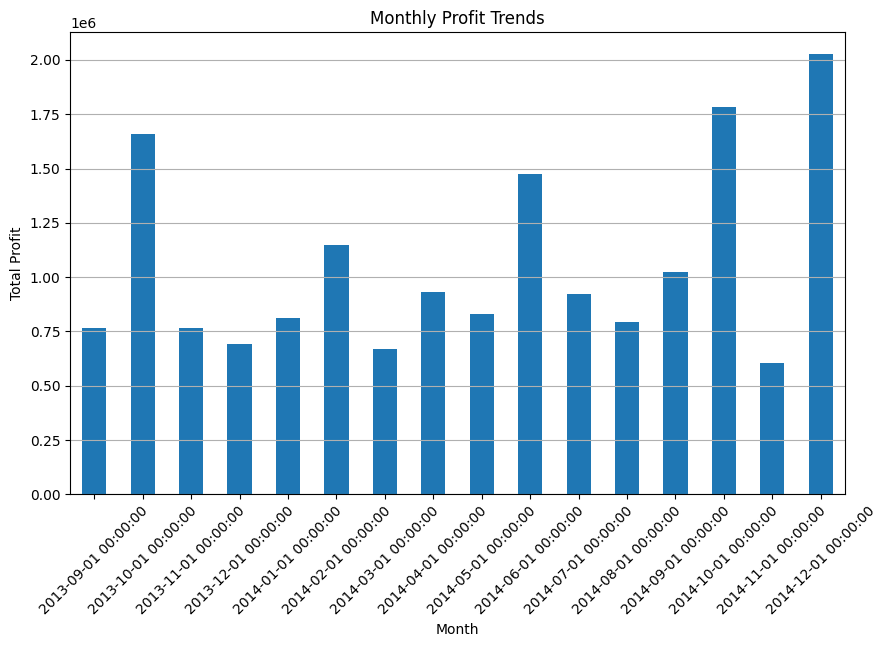

In [142]:
import matplotlib.pyplot as plt

monthly_profit.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Profit Trends')
plt.ylabel('Total Profit')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

In [147]:
# Calculate month-over-month growth
profit_growth = monthly_profit.pct_change() * 100
print("\nMonth-over-Month Profit Growth (%):")
print(profit_growth)


Month-over-Month Profit Growth (%):
Date
2013-09-01           NaN
2013-10-01    117.101692
2013-11-01    -53.824070
2013-12-01     -9.658785
2014-01-01     17.708353
2014-02-01     41.094215
2014-03-01    -41.677037
2014-04-01     38.831255
2014-05-01    -10.897441
2014-06-01     77.852109
2014-07-01    -37.312075
2014-08-01    -14.374305
2014-09-01     29.335820
2014-10-01     74.169658
2014-11-01    -66.071550
2014-12-01    235.058755
Freq: MS, Name: Profit, dtype: float64


In [138]:
actual_monthly_profit = monthly_profit[monthly_profit > 0]
print(actual_monthly_profit)


Date
2013-01-31     4100802.01
2014-01-31    13570221.53
Name: Profit, dtype: float64


In [139]:
# When reading the CSV or converting dates, specify the dayfirst parameter
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [119]:
print(df.columns.tolist())  # Show all column names

['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Month Number', 'Month Name', 'Year', 'Profit_MA']


In [140]:
# Create Date column from Year and Month Number
df['Date'] = pd.to_datetime(
    df['Year'].astype(str) + '-' + 
    df['Month Number'].astype(str) + '-01'
)

# Verify the new Date column
print(df[['Year', 'Month Number', 'Month Name', 'Date']].head())

# Calculate monthly profit
monthly_profit = df.groupby(pd.Grouper(key='Date', freq='MS'))['Profit'].sum()

# Alternative grouping by Year-Month for better readability
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_profit_alt = df.groupby('YearMonth')['Profit'].sum()

# Display results
print("\nMonthly Profit (by calendar month):")
print(monthly_profit)

print("\nMonthly Profit (by Year-Month period):")
print(monthly_profit_alt)

     Year  Month Number   Month Name       Date
0    2013             9   September  2013-09-01
112  2013             9   September  2013-09-01
113  2013             9   September  2013-09-01
114  2013             9   September  2013-09-01
115  2013             9   September  2013-09-01

Monthly Profit (by calendar month):
Date
2013-09-01     763603.03
2013-10-01    1657795.10
2013-11-01     765502.30
2013-12-01     691564.08
2014-01-01     814028.69
2014-02-01    1148547.39
2014-03-01     669866.87
2014-04-01     929984.58
2014-05-01     828640.06
2014-06-01    1473753.82
2014-07-01     923865.69
2014-08-01     791066.42
2014-09-01    1023132.24
2014-10-01    1781985.92
2014-11-01     604600.20
2014-12-01    2025765.90
Freq: MS, Name: Profit, dtype: float64

Monthly Profit (by Year-Month period):
YearMonth
2013-09     763603.03
2013-10    1657795.10
2013-11     765502.30
2013-12     691564.08
2014-01     814028.69
2014-02    1148547.39
2014-03     669866.87
2014-04     929984.58
2014-

In [144]:
first_year_avg = profit_growth.iloc[1:13].mean()  # First full year average
profit_growth_filled = profit_growth.fillna(first_year_avg)

In [145]:
print(profit_growth_filled)

Date
2013-09-01     12.848311
2013-10-01    117.101692
2013-11-01    -53.824070
2013-12-01     -9.658785
2014-01-01     17.708353
2014-02-01     41.094215
2014-03-01    -41.677037
2014-04-01     38.831255
2014-05-01    -10.897441
2014-06-01     77.852109
2014-07-01    -37.312075
2014-08-01    -14.374305
2014-09-01     29.335820
2014-10-01     74.169658
2014-11-01    -66.071550
2014-12-01    235.058755
Freq: MS, Name: Profit, dtype: float64


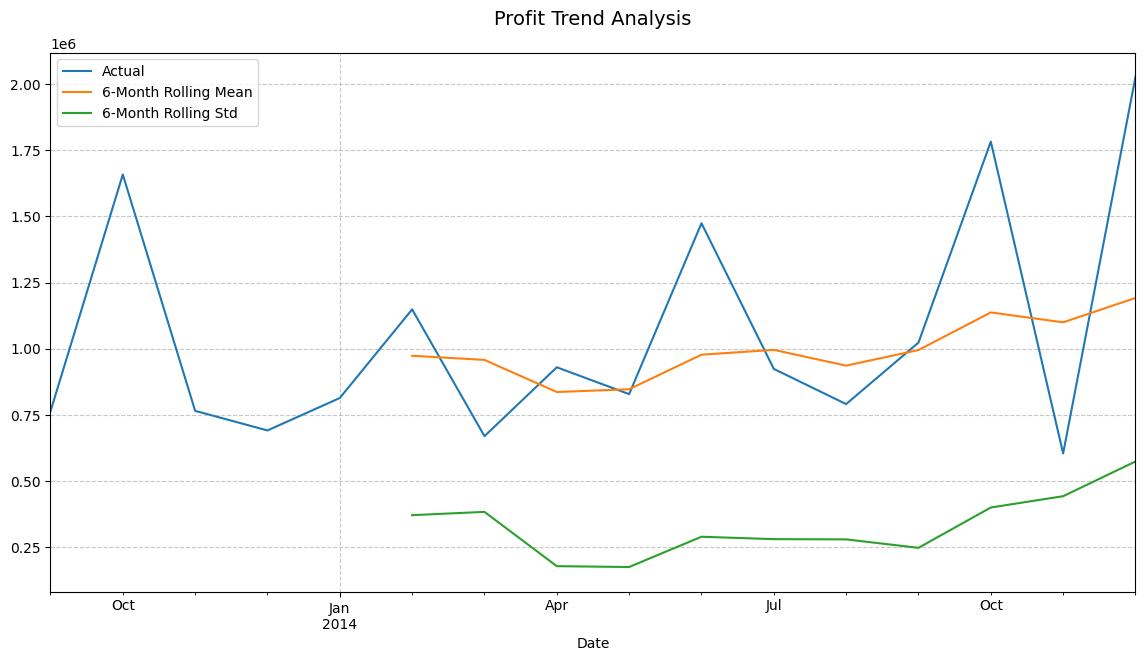

In [150]:
# Rolling statistics to identify trends
plt.figure(figsize=(14,7))
ts.plot(label='Actual', color='#1f77b4')
ts.rolling(window=6).mean().plot(label='6-Month Rolling Mean', color='#ff7f0e')
ts.rolling(window=6).std().plot(label='6-Month Rolling Std', color='#2ca02c')
plt.title('Profit Trend Analysis', pad=20, fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

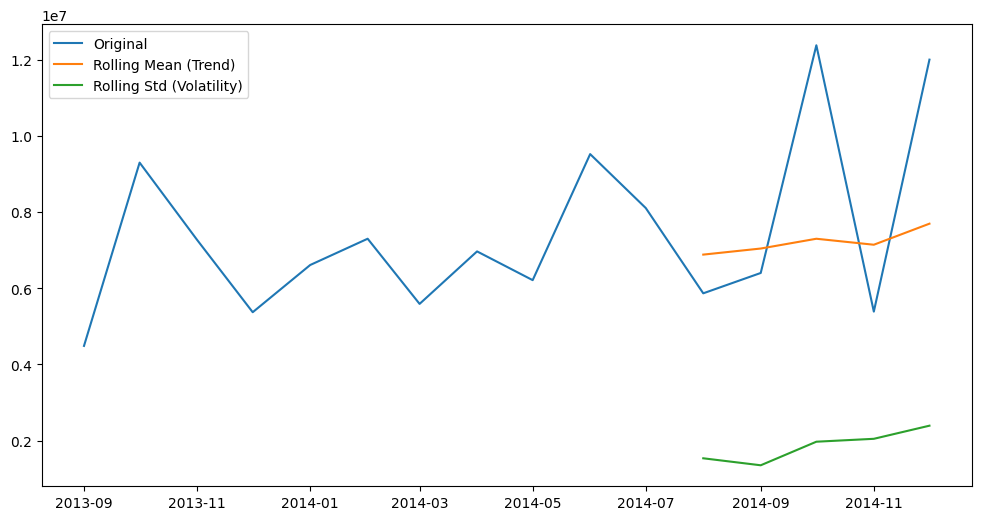

In [203]:
# 12-month rolling averages
rolling_mean = ts_sales.rolling(window=12).mean()
rolling_std = ts_sales.rolling(window=12).std()

plt.figure(figsize=(12,6))
plt.plot(ts_sales, label='Original')
plt.plot(rolling_mean, label='Rolling Mean (Trend)')
plt.plot(rolling_std, label='Rolling Std (Volatility)')
plt.legend()
plt.show()

ADF Statistic: -5.080496076955279
p-value: 1.5341776704767455e-05


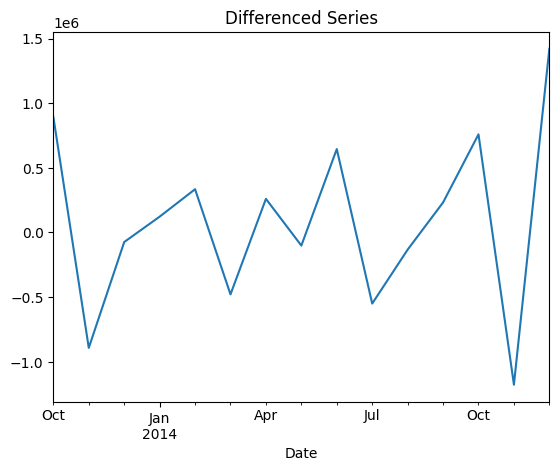

In [151]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
adf_result = adfuller(ts)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Differencing if needed (typically d=1 for non-stationary data)
diff_ts = ts.diff().dropna()
diff_ts.plot(title='Differenced Series')
plt.show()

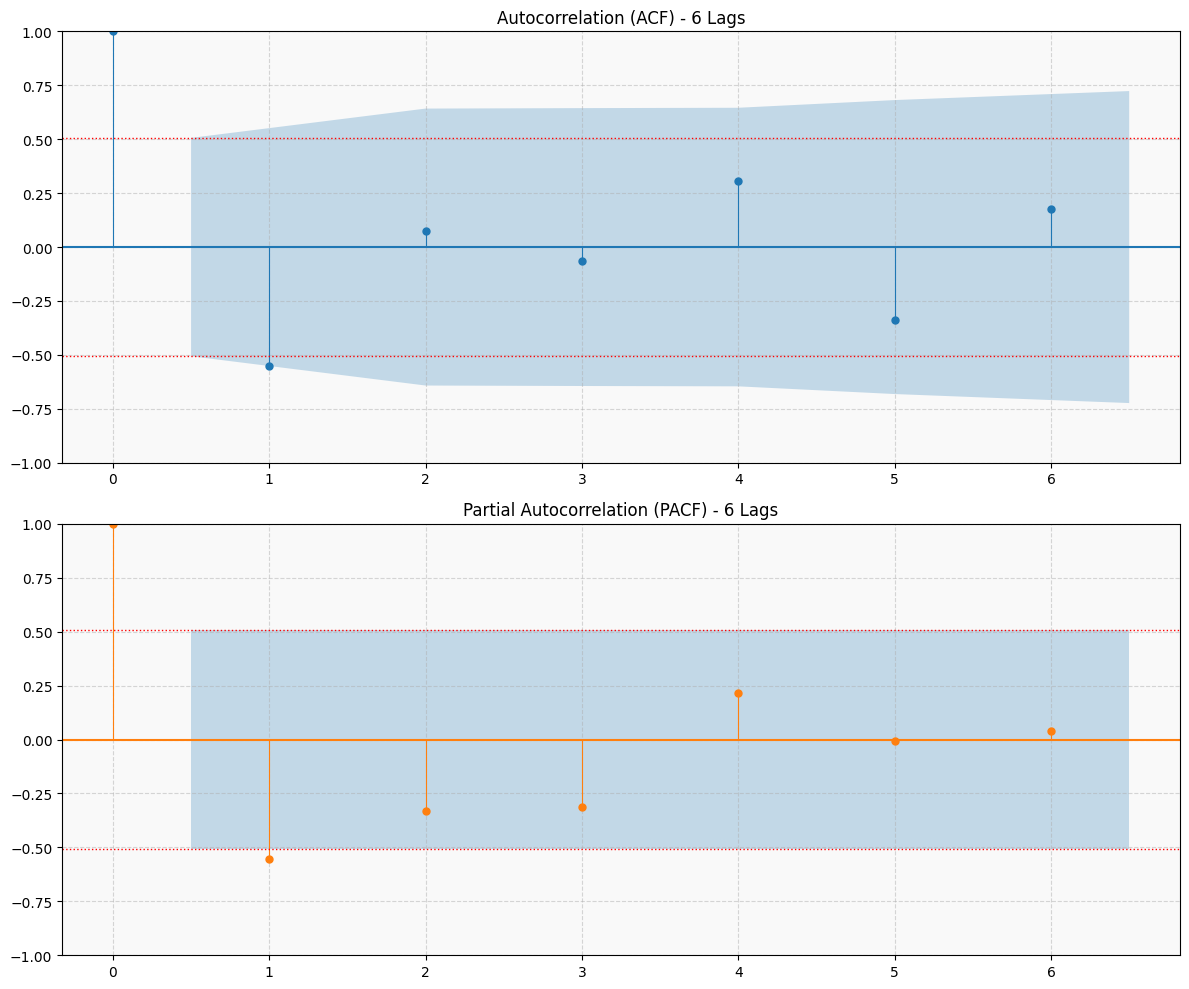

In [156]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare differenced series
diff_ts = ts.diff().dropna()

# 2. Calculate automatic maximum lags (rule of thumb: min(20, len(diff_ts)//2)
max_lags = min(20, len(diff_ts)//2 - 1)

# 3. Create figure with professional styling
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Color settings
acf_color = '#1f77b4'  # Blue
pacf_color = '#ff7f0e'  # Orange
ci_color = 'red'        # Confidence intervals
grid_style = {'linestyle': '--', 'alpha': 0.5}

# 4. ACF Plot with automatic lag adjustment
plot_acf(diff_ts, 
         ax=ax1, 
         lags=max_lags,
         alpha=0.05,
         color=acf_color,
         title=f'Autocorrelation (ACF) - {max_lags} Lags',
         vlines_kwargs={'colors': acf_color, 'linewidth': 0.8})
ax1.grid(True, **grid_style)
ax1.set_facecolor('#f9f9f9')

# 5. PACF Plot with same lag settings
plot_pacf(diff_ts, 
          ax=ax2, 
          lags=max_lags,
          alpha=0.05,
          color=pacf_color,
          title=f'Partial Autocorrelation (PACF) - {max_lags} Lags',
          vlines_kwargs={'colors': pacf_color, 'linewidth': 0.8})
ax2.grid(True, **grid_style)
ax2.set_facecolor('#f9f9f9')

# 6. Add confidence interval lines
conf_int = 1.96/np.sqrt(len(diff_ts))
for ax in (ax1, ax2):
    ax.axhline(conf_int, color=ci_color, linestyle=':', linewidth=1)
    ax.axhline(-conf_int, color=ci_color, linestyle=':', linewidth=1)

plt.tight_layout()
plt.show()

In [191]:
df.shape

(700, 19)

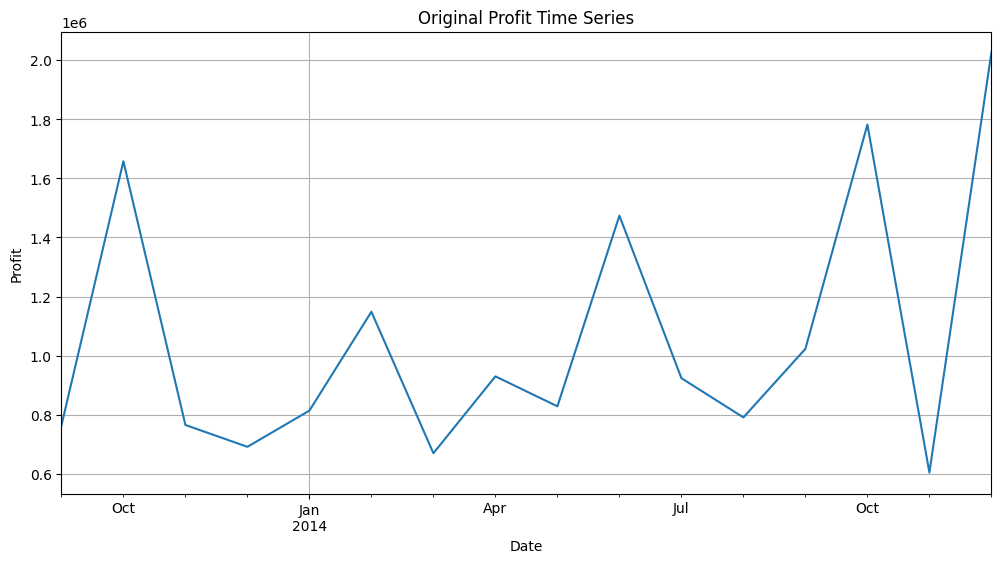

In [193]:
ts = ts.fillna(ts.interpolate())

# Plot original series
plt.figure(figsize=(12,6))
ts.plot(title='Original Profit Time Series')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

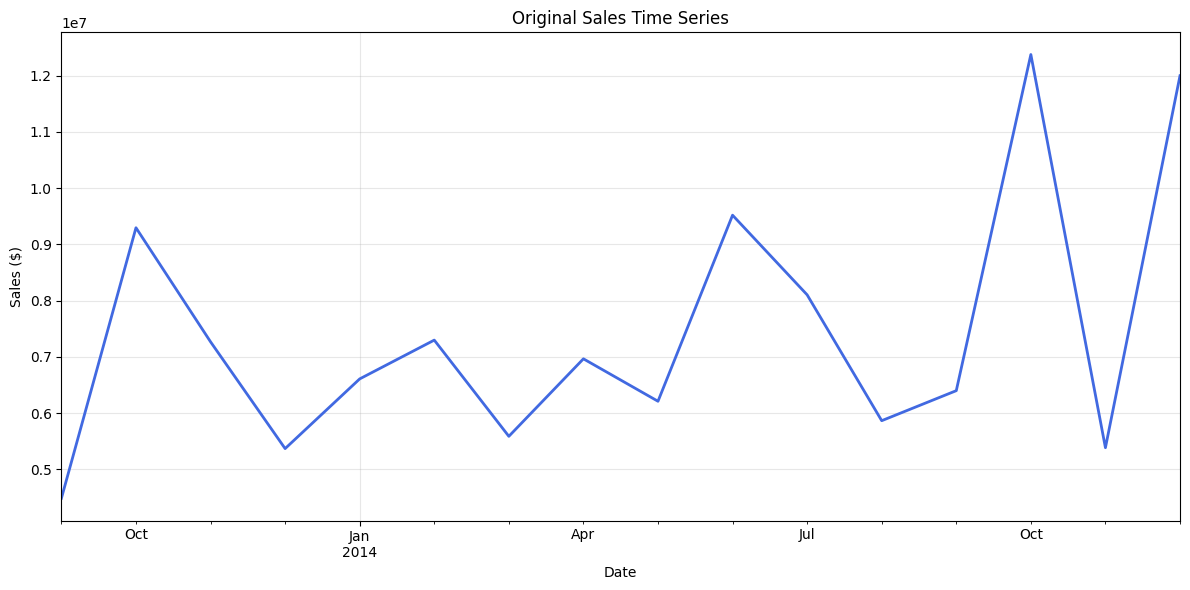

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Prepare the time series (with proper variable naming)
df['Date'] = pd.to_datetime(df['Date'])
ts_sales = df.set_index('Date')['Sales'].resample('MS').sum()  # Note: ts_sales (lowercase s)

# Handle missing values
ts_sales = ts_sales.fillna(ts_sales.interpolate())  # Fixed variable name

# Plot original series
plt.figure(figsize=(12,6))
ts_sales.plot(title='Original Sales Time Series', color='royalblue', linewidth=2)
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

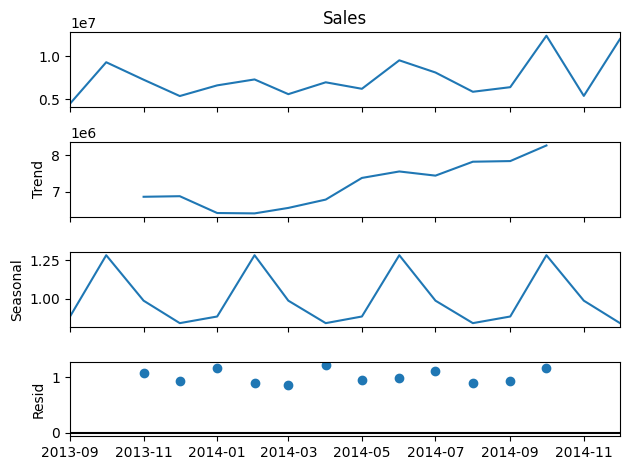

In [200]:
decomposition = seasonal_decompose(ts_sales, model='multiplicative', period=4)  # Quarterly seasonality
decomposition.plot()
plt.show()

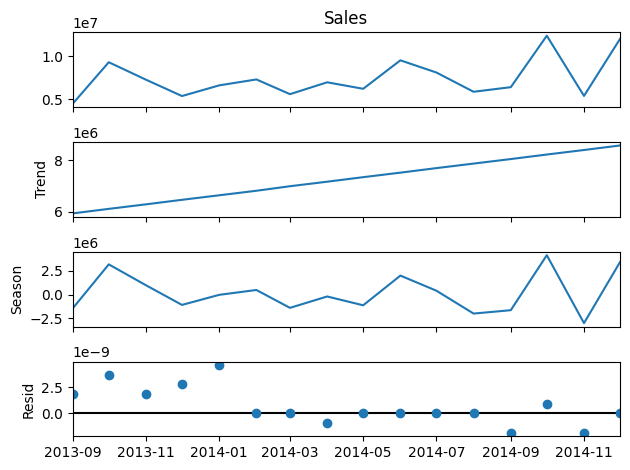

C:\Users\sares\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sares\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


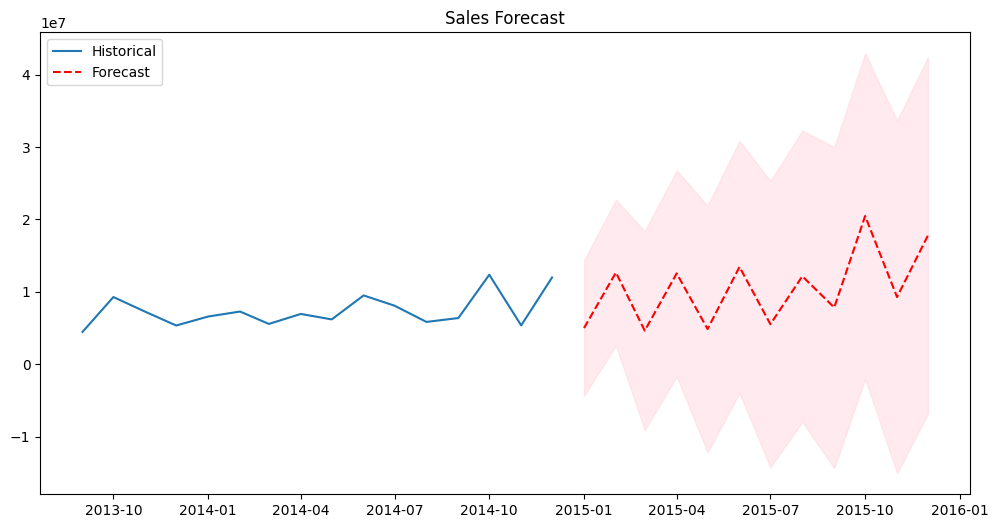

In [205]:
# Forecast next 12 months
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import STL

# 1. Prepare the data (if not already done)
ts_sales = df.set_index('Date')['Sales'].resample('MS').sum()
ts_sales = ts_sales.fillna(ts_sales.interpolate())

# 2. Decomposition (using STL for short series)
stl = STL(ts_sales, period=12)
res = stl.fit()
res.plot()
plt.show()

# 3. Fit SARIMA model (example parameters - adjust as needed)
order = (1, 1, 1)          # (p,d,q)
seasonal_order = (1, 1, 1, 12)  # (P,D,Q,m)

model = SARIMAX(ts_sales, 
               order=order,
               seasonal_order=seasonal_order)
results = model.fit()  # This creates the 'results' object

# 4. Now forecasting will work
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)  # No more NameError
forecast_index = pd.date_range(ts_sales.index[-1], periods=forecast_steps+1, freq='MS')[1:]

# 5. Plotting
plt.figure(figsize=(12,6))
plt.plot(ts_sales.index, ts_sales, label='Historical')
plt.plot(forecast_index, forecast.predicted_mean, 'r--', label='Forecast')
plt.fill_between(forecast_index,
                forecast.conf_int()['lower Sales'],
                forecast.conf_int()['upper Sales'],
                color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.legend()
plt.show()

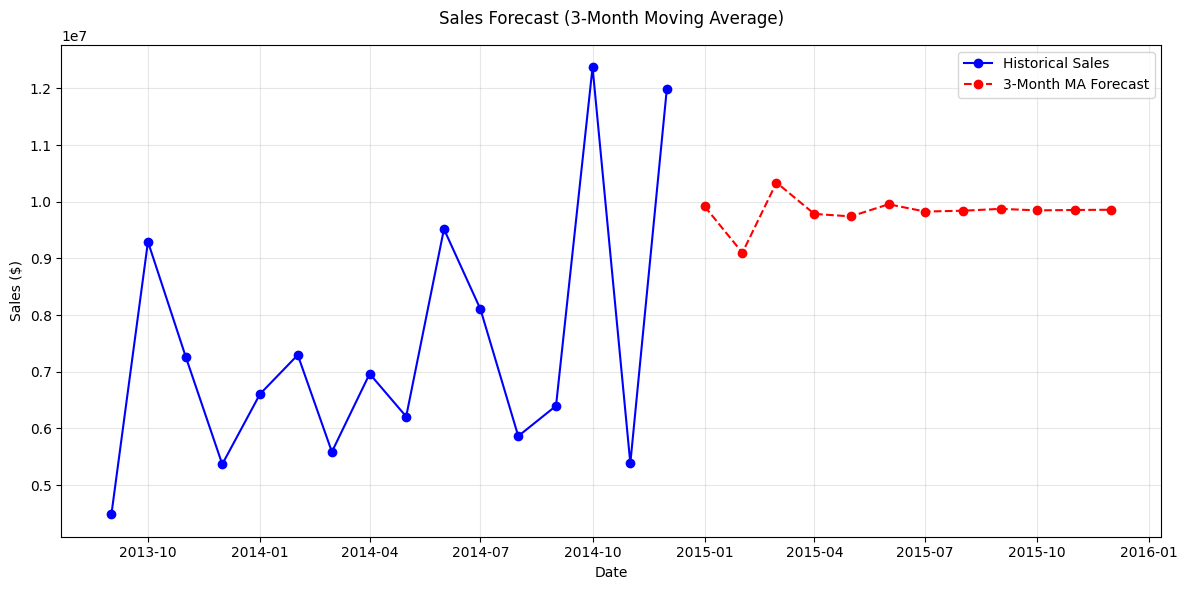

Forecast Results:
             Forecast
Date                 
Jan 2015   9919607.34
Feb 2015   9100869.81
Mar 2015  10339755.02
Apr 2015   9786744.06
May 2015   9742456.30
Jun 2015   9956318.46
Jul 2015   9828506.27
Aug 2015   9842427.01
Sep 2015   9875750.58
Oct 2015   9848894.62
Nov 2015   9855690.73
Dec 2015   9860111.98


In [213]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Prepare data
ts = ts_sales.copy()

# 2. Calculate 3-month moving average
forecast_steps = 12
ma_window = 3  # Use last 3 months to forecast

# 3. Create forecasts
forecasts = []
for i in range(forecast_steps):
    # Last available moving average
    last_ma = ts.rolling(window=ma_window).mean().iloc[-1]
    forecasts.append(last_ma)
    
    # Append forecast to series (for next prediction)
    next_date = ts.index[-1] + pd.DateOffset(months=1)
    ts = pd.concat([ts, pd.Series([last_ma], index=[next_date])])

# 4. Get forecast dates
forecast_index = pd.date_range(ts_sales.index[-1] + pd.DateOffset(months=1), 
                              periods=forecast_steps, 
                              freq='MS')

# 5. Plot results
plt.figure(figsize=(12,6))
plt.plot(ts_sales.index, ts_sales, 'bo-', label='Historical Sales')
plt.plot(forecast_index, forecasts, 'ro--', label='3-Month MA Forecast')
plt.title('Sales Forecast (3-Month Moving Average)', pad=15)
plt.ylabel('Sales ($)')
plt.xlabel('Date')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Create forecast table
forecast_df = pd.DataFrame({
    'Date': forecast_index.strftime('%b %Y'),
    'Forecast': [round(f, 2) for f in forecasts]
}).set_index('Date')

print("Forecast Results:")
print(forecast_df)

C:\Users\sares\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sares\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sares\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sares\AppData\Loc

Tried {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)}: MAE = 1914780.10
Tried {'order': (0, 1, 1), 'seasonal_order': (0, 1, 1, 12)}: MAE = 1914780.10
Failed with {'order': (1, 1, 0), 'seasonal_order': (1, 1, 0, 12)}: Schur decomposition solver error.

Best parameters: {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)} with MAE: 1914780.10


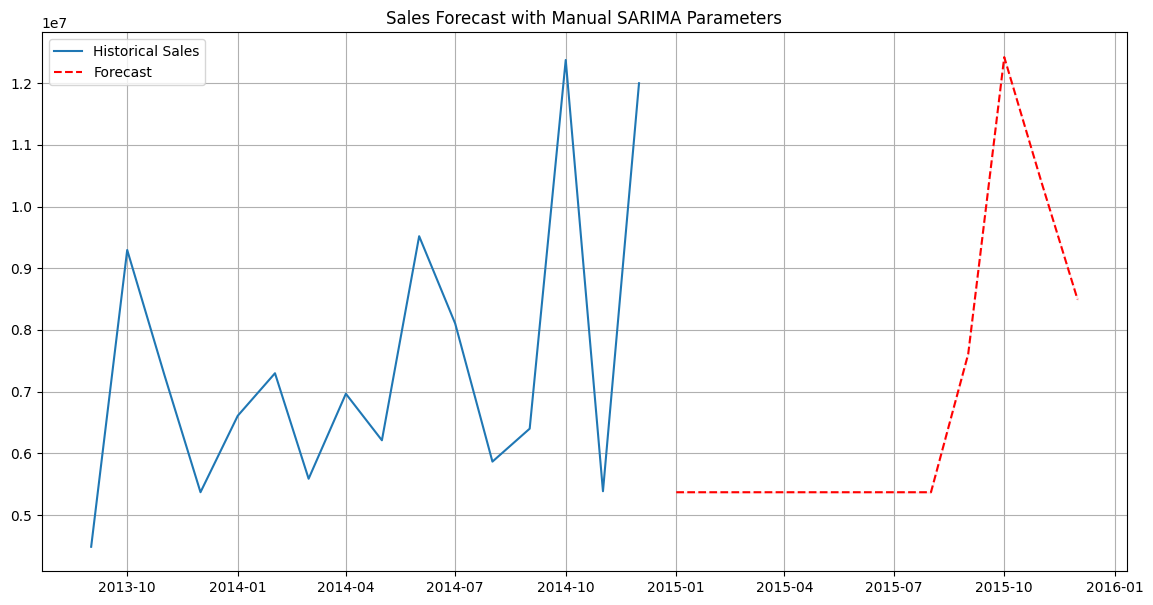


Forecast Results:
               Forecast     Lower_CI     Upper_CI
Date                                             
2015-01-01   5368441.08   5366481.12   5370401.04
2015-02-01   5368441.08   5365669.27   5371212.89
2015-03-01   5368441.08   5365046.32   5371835.84
2015-04-01   5368441.08   5364521.15   5372361.01
2015-05-01   5368441.08   5364058.47   5372823.69
2015-06-01   5368441.08   5363640.17   5373241.99
2015-07-01   5368441.08   5363255.50   5373626.66
2015-08-01   5368441.08   5362897.46   5373984.70
2015-09-01   7610442.22   7604727.99   7616156.45
2015-10-01  12422053.29  12416339.05  12427767.52
2015-11-01  10393645.49  10387931.25  10399359.72
2015-12-01   8494883.27   8489169.03   8500597.50


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# 1. Prepare your data
df['Date'] = pd.to_datetime(df['Date'])
ts_sales = df.set_index('Date')['Sales'].resample('MS').sum()
ts_sales = ts_sales.fillna(ts_sales.interpolate())

# 2. Manual SARIMA parameter selection
# Try these common parameter combinations:
param_combinations = [
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (0, 1, 1), 'seasonal_order': (0, 1, 1, 12)},
    {'order': (1, 1, 0), 'seasonal_order': (1, 1, 0, 12)}
]
best_model = None
best_mae = float('inf')

# 3. Find best parameters through validation
for params in param_combinations:
    try:
        # Split data
        train = ts_sales.iloc[:-12]
        test = ts_sales.iloc[-12:]
        
        # Fit model
        model = SARIMAX(train, **params)
        results = model.fit(disp=False)
        
        # Forecast
        forecast = results.get_forecast(steps=12)
        predicted = forecast.predicted_mean
        
        # Evaluate
        mae = mean_absolute_error(test, predicted)
        
        if mae < best_mae:
            best_mae = mae
            best_model = params
            best_results = results
            
        print(f"Tried {params}: MAE = {mae:.2f}")
        
    except Exception as e:
        print(f"Failed with {params}: {str(e)}")
# 4. Use best model for final forecast
print(f"\nBest parameters: {best_model} with MAE: {best_mae:.2f}")

# Final forecast
forecast_steps = 12
forecast = best_results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(ts_sales.index[-1], periods=forecast_steps+1, freq='MS')[1:]

# 5. Plot results
plt.figure(figsize=(14,7))
plt.plot(ts_sales.index, ts_sales, label='Historical Sales')
plt.plot(forecast_index, forecast.predicted_mean, 'r--', label='Forecast')
plt.fill_between(forecast_index,
                forecast.conf_int()['lower Sales'],
                forecast.conf_int()['upper Sales'],
                color='pink', alpha=0.3)
plt.title('Sales Forecast with Manual SARIMA Parameters')
plt.legend()
plt.grid(True)
plt.show()
# 6. Show forecast values
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast.predicted_mean,
    'Lower_CI': forecast.conf_int()['lower Sales'],
    'Upper_CI': forecast.conf_int()['upper Sales']
}).set_index('Date')

print("\nForecast Results:")
print(forecast_df.round(2))

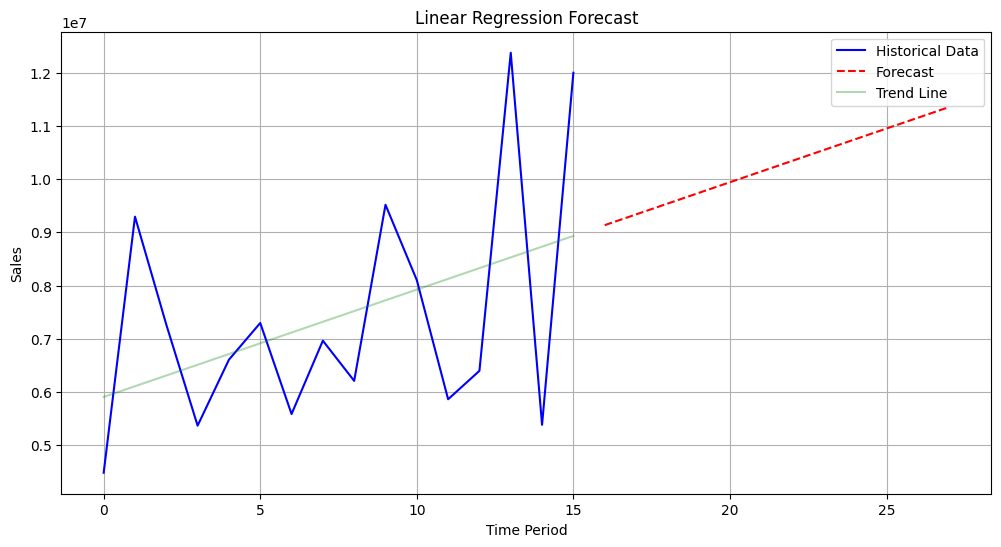

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Assuming ts_sales is your time series data (e.g., a pandas Series)
# Create time index
X = np.array(range(len(ts_sales))).reshape(-1, 1)
y = ts_sales.values
# Fit model
model = LinearRegression().fit(X, y)
# Forecast
future_X = np.array(range(len(ts_sales), len(ts_sales)+12)).reshape(-1,1)
forecast = model.predict(future_X)
# Create the plot
plt.figure(figsize=(12, 6))
# Plot historical data
plt.plot(X, y, 'b-', label='Historical Data')
# Plot forecast
forecast_period = np.array(range(len(ts_sales), len(ts_sales)+12))
plt.plot(forecast_period, forecast, 'r--', label='Forecast')
# Plot the regression line (optional)
regression_line = model.predict(X)
plt.plot(X, regression_line, 'g-', alpha=0.3, label='Trend Line')
# Add labels and title
plt.xlabel('Time Period')
plt.ylabel('Sales')
plt.title('Linear Regression Forecast')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [221]:
df.to_csv("cleaned_financial_data.csv", index=False)


In [229]:
import os
os.listdir()


['.anaconda',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.dotnet',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.sts4',
 '.vscode',
 'anaconda3',
 'AppData',
 'Application Data',
 'classes',
 'cleaned_financial_data.csv',
 'Contacts',
 'Cookies',
 'CrossDevice',
 'data.ipynb',
 'Documents',
 'Downloads',
 'exported_data.csv',
 'Favorites',
 'finance.ipynb',
 'financial.ipynb',
 'gen.ipynb',
 'java',
 'java script',
 'Links',
 'Local Settings',
 'Microsoft',
 'Music',
 'My Documents',
 'Naukri Launcher.lnk',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bb-efea-11ee-a54d-000d3a94eaa1}.TxR.0.regtrans-ms',
 'NTUSER.DAT{2ad838bb-efea-11ee-a54d-000d3a94eaa1}.TxR.1.regtrans-ms',
 'NTUSER.DAT{2ad838bb-efea-11ee-a54d-000d3a94eaa1}.TxR.2.regtrans-ms',
 'NTUSER.DAT{2ad838bb-efea-11ee-a54d-000d3a94eaa1}.TxR.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMCo